In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import plot_date
from prophet import Prophet
from datetime import timedelta
import matplotlib.dates as mdates
from calendar import month_abbr
import calendar
from sklearn.metrics import mean_absolute_error



In [20]:
# Read the data
df = pd.read_csv('day_ahead_energy_prices.csv', parse_dates=['Datetime'])
'''
# Filter data for the last 6 months
end_date = df['Datetime'].max()
start_date = end_date - timedelta(days=180)
df = df[(df['Datetime'] >= start_date) & (df['Datetime'] <= end_date)].reset_index(drop=True)
 '''
df


,Datetime,hourly day-ahead energy price
0,2024-10-29 22:00:00+00:00,103.09
1,2024-10-29 21:00:00+00:00,118.08
2,2024-10-29 20:00:00+00:00,124.05
3,2024-10-29 19:00:00+00:00,140.60
4,2024-10-29 18:00:00+00:00,203.82
...,...,...
83876,2018-10-01 02:00:00+00:00,47.59
83877,2018-10-01 01:00:00+00:00,47.38
83878,2018-10-01 00:00:00+00:00,51.41
83879,2018-09-30 23:00:00+00:00,56.10


In [22]:
# Rename columns for Prophet 
df.rename(columns={'Datetime': 'ds', 'hourly day-ahead energy price': 'y'}, inplace=True)

# Ensure the datetime column is correctly formatted
df['ds'] = pd.to_datetime(df['ds'])
df['ds'] = df['ds'].dt.tz_localize(None)  # Remove timezone information


### The Prophet model 

In [ ]:
# Initialize the Prophet model
m = Prophet()
m.fit(df)

# Create a DataFrame to hold future dates (for 3 months ahead)
future = m.make_future_dataframe(periods=90)  # For 90 days ahead

# Make predictions
forecast = m.predict(future)

# Plot the results
fig1 = m.plot(forecast)

# Add the legend manually
ax1 = fig1.gca()  # Get the axes object for the forecast plot
ax1.plot(df['ds'], df['y'], label='Observed Data', color='b', linewidth=2)  # Plot actual data in blue
ax1.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange', linestyle='--', linewidth=2)  # Plot forecast in orange

# Add a vertical line indicating the end of historical data
end_date = df['ds'].max()  
plt.axvline(x=end_date, color='red', linestyle='--', label='End of Historical Data')

# Add title and labels for the forecast plot
plt.title('Forecasted Energy Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy Price', fontsize=14)

# Display the legend
plt.legend(loc='upper left', fontsize=12)

# Show the plot
plt.show()


### Calculate Biweekly Average Prices

In [ ]:
# Calculate Biweekly Average Prices
biweekly_avg = df.resample('2W', on='ds').mean().reset_index()
biweekly_avg.columns = ['ds', 'y']

# Ensure the datetime column is correctly formatted
biweekly_avg['ds'] = pd.to_datetime(biweekly_avg['ds'])
biweekly_avg['ds'] = biweekly_avg['ds'].dt.tz_localize(None)  # Remove timezone information

biweekly_avg.columns

In [ ]:
# Initialize the Prophet model
m = Prophet()
m.fit(biweekly_avg)

# Create a DataFrame to hold future dates (for 3 months ahead)
future = m.make_future_dataframe(periods=90) 

# Make predictions
forecast = m.predict(future)

# Plot the results
fig3 = m.plot(forecast)
ax1 = fig3.gca()  # Get the axis object for the forecast plot

# Plot the observed data
ax1.plot(biweekly_avg['ds'], biweekly_avg['y'], label='Observed Data', color='b', linewidth=2)  # Add observed data in blue

# Add a vertical line indicating the end of historical data
end_date = biweekly_avg['ds'].max()  # End of historical data
plt.axvline(x=end_date, color='red', linestyle='--', label='End of Historical Data')

# Add title and labels for the forecast plot
plt.title('Forecasted Energy Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Energy Price', fontsize=14)

# Display the legend to indicate observed data, forecast, and the vertical line
plt.legend(loc='upper left', fontsize=12)

# Show the plot
plt.show()

fig4 = m.plot_components(forecast)
plt.show()


### Predict 29.10.2024

In [46]:
train_data = df
print(train_data.head())

                   ds       y
0 2024-10-29 22:00:00  103.09
1 2024-10-29 21:00:00  118.08
2 2024-10-29 20:00:00  124.05
3 2024-10-29 19:00:00  140.60
4 2024-10-29 18:00:00  203.82


In [24]:
# Initialize Prophet model with German holidays
model = Prophet()
model.fit(train_data)  # Fit the model on the training data

# Create a dataframe for forecasting only the target date, October 29, 2024
future = pd.DataFrame({
    'ds': pd.date_range(start='2024-10-29 00:00:00', end='2024-10-29 22:00:00', freq='h')
})
forecast = model.predict(future)

# 49s 445ms 

23:17:13 - cmdstanpy - INFO - Chain [1] start processing
23:17:49 - cmdstanpy - INFO - Chain [1] done processing


In [25]:
future_df = pd.DataFrame(forecast, columns=['ds'] + ['yhat'])
future_df

,ds,yhat
0,2024-10-29 00:00:00,45.166298
1,2024-10-29 01:00:00,40.478353
2,2024-10-29 02:00:00,39.268484
3,2024-10-29 03:00:00,44.393045
4,2024-10-29 04:00:00,54.206201
5,2024-10-29 05:00:00,63.215895
6,2024-10-29 06:00:00,66.210146
7,2024-10-29 07:00:00,62.005117
8,2024-10-29 08:00:00,53.550756
9,2024-10-29 09:00:00,44.797461


In [26]:
# Actual values for October 29, 2024
actual_data = {
    'ds': pd.to_datetime([
        '2024-10-29 00:00:00', '2024-10-29 01:00:00', '2024-10-29 02:00:00', '2024-10-29 03:00:00',
        '2024-10-29 04:00:00', '2024-10-29 05:00:00', '2024-10-29 06:00:00', '2024-10-29 07:00:00',
        '2024-10-29 08:00:00', '2024-10-29 09:00:00', '2024-10-29 10:00:00', '2024-10-29 11:00:00',
        '2024-10-29 12:00:00', '2024-10-29 13:00:00', '2024-10-29 14:00:00', '2024-10-29 15:00:00',
        '2024-10-29 16:00:00', '2024-10-29 17:00:00', '2024-10-29 18:00:00', '2024-10-29 19:00:00',
        '2024-10-29 20:00:00', '2024-10-29 21:00:00', '2024-10-29 22:00:00'
    ]),
    'y': [
        100.04, 98.83, 98.17, 100.02, 113.1, 127.38, 157.73, 151.32,
        129.69, 120.7, 112.97, 105.45, 117.73, 135.94, 172.26, 212.72,
        285.8, 257.44, 203.82, 140.6, 124.05, 118.08, 103.09
    ]
}

actual_df = pd.DataFrame(actual_data)
actual_df

,ds,y
0,2024-10-29 00:00:00,100.04
1,2024-10-29 01:00:00,98.83
2,2024-10-29 02:00:00,98.17
3,2024-10-29 03:00:00,100.02
4,2024-10-29 04:00:00,113.10
5,2024-10-29 05:00:00,127.38
6,2024-10-29 06:00:00,157.73
7,2024-10-29 07:00:00,151.32
8,2024-10-29 08:00:00,129.69
9,2024-10-29 09:00:00,120.70


In [27]:
future_df

,ds,yhat
0,2024-10-29 00:00:00,45.166298
1,2024-10-29 01:00:00,40.478353
2,2024-10-29 02:00:00,39.268484
3,2024-10-29 03:00:00,44.393045
4,2024-10-29 04:00:00,54.206201
5,2024-10-29 05:00:00,63.215895
6,2024-10-29 06:00:00,66.210146
7,2024-10-29 07:00:00,62.005117
8,2024-10-29 08:00:00,53.550756
9,2024-10-29 09:00:00,44.797461


In [28]:
from sklearn.metrics import mean_squared_error
 # Extract only the predicted values for comparison

# Merge predicted values with the actual values
future_df = future_df.merge(actual_df, on='ds', how='left')  # Ensure merge works as intended

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(future_df['y'], future_df['yhat'])
print(f"Mean Squared Error (MSE) for October 29, 2024: {mse:.2f}")

Mean Squared Error (MSE) for October 29, 2024: 10960.58


###### Mean Squared Error (MSE) for October 29, 2024: 10960.58 

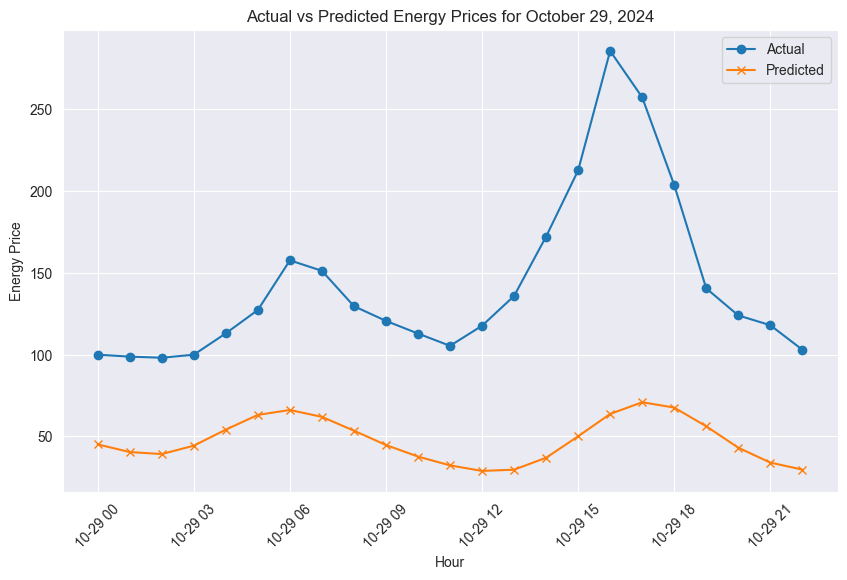

In [29]:
# plot the actual and predicted values 
plt.figure(figsize=(10, 6))
plt.plot(future_df['ds'], future_df['y'], label='Actual', marker='o')  # Use 'y' for actual values
plt.plot(future_df['ds'], future_df['yhat'], label='Predicted',
            marker='x')  # Use 'yhat' for predicted values
plt.xlabel('Hour')
plt.ylabel('Energy Price')
plt.title('Actual vs Predicted Energy Prices for October 29, 2024')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()


### Add Weather Data as Regressors 

In [ ]:
actual_data = {
    'ds': pd.to_datetime([
        '2024-10-29 00:00:00', '2024-10-29 01:00:00', '2024-10-29 02:00:00', '2024-10-29 03:00:00',
        '2024-10-29 04:00:00', '2024-10-29 05:00:00', '2024-10-29 06:00:00', '2024-10-29 07:00:00',
        '2024-10-29 08:00:00', '2024-10-29 09:00:00', '2024-10-29 10:00:00', '2024-10-29 11:00:00',
        '2024-10-29 12:00:00', '2024-10-29 13:00:00', '2024-10-29 14:00:00', '2024-10-29 15:00:00',
        '2024-10-29 16:00:00', '2024-10-29 17:00:00', '2024-10-29 18:00:00', '2024-10-29 19:00:00',
        '2024-10-29 20:00:00', '2024-10-29 21:00:00', '2024-10-29 22:00:00'
    ]),
    'y': [
        100.04, 98.83, 98.17, 100.02, 113.1, 127.38, 157.73, 151.32,
        129.69, 120.7, 112.97, 105.45, 117.73, 135.94, 172.26, 212.72,
        285.8, 257.44, 203.82, 140.6, 124.05, 118.08, 103.09
    ]
}

actual_df = pd.DataFrame(actual_data)
actual_df

00:43:06 - cmdstanpy - INFO - Chain [1] start processing
00:43:40 - cmdstanpy - INFO - Chain [1] done processing
/var/folders/c2/m2f6fpdd18v2x0p7_bb7j_780000gn/T/ipykernel_31780/695517846.py:29: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  future_dates = pd.date_range(start='2024-10-29 00:00:00', end='2024-10-29 22:00:00', freq='H')


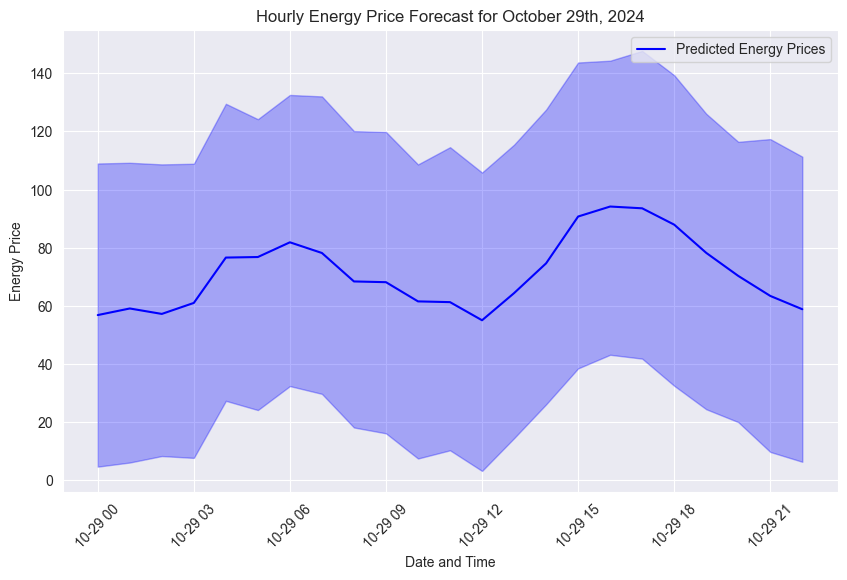

                    ds       yhat  yhat_lower  yhat_upper
0  2024-10-29 00:00:00  56.851079    4.736635  108.974858
1  2024-10-29 01:00:00  59.117458    6.147789  109.219578
2  2024-10-29 02:00:00  57.247770    8.377161  108.664437
3  2024-10-29 03:00:00  61.029087    7.743001  108.883150
4  2024-10-29 04:00:00  76.622917   27.364820  129.502804
5  2024-10-29 05:00:00  76.812473   24.193723  124.207781
6  2024-10-29 06:00:00  81.874098   32.433632  132.543659
7  2024-10-29 07:00:00  78.200230   29.759528  132.038481
8  2024-10-29 08:00:00  68.415761   18.197872  120.112685
9  2024-10-29 09:00:00  68.160231   16.184617  119.810234
10 2024-10-29 10:00:00  61.558395    7.531109  108.646451
11 2024-10-29 11:00:00  61.299643   10.351178  114.580924
12 2024-10-29 12:00:00  55.065313    3.257376  105.851963
13 2024-10-29 13:00:00  64.402953   14.515373  115.449516
14 2024-10-29 14:00:00  74.646490   26.139946  127.507135
15 2024-10-29 15:00:00  90.739090   38.517436  143.703523
16 2024-10-29 

In [124]:
# Step 1: Load the energy prices and weather data
energy_data = pd.read_csv('day_ahead_energy_prices.csv')  # Adjust file path if needed
weather_data = pd.read_csv('daily_weather.csv')  # Adjust file path if needed

# Step 2: Convert datetime columns to datetime type and remove timezone if necessary
energy_data['Datetime'] = pd.to_datetime(energy_data['Datetime']).dt.tz_localize(None)
weather_data['date'] = pd.to_datetime(weather_data['date']).dt.tz_localize(None)

# Step 3: Rename columns to match Prophet's expected column names
energy_data = energy_data.rename(columns={'Datetime': 'ds', 'hourly day-ahead energy price': 'y'})
weather_data = weather_data.rename(columns={'date': 'ds'})  # Use 'ds' to merge on datetime

# Step 4: Merge data on datetime ('ds') column
merged_data = pd.merge(energy_data, weather_data, on='ds', how='left')

# Step 5: Check for and handle missing values if needed
merged_data[['temperature_2m', 'cloud_cover', 'wind_speed_10m']] = merged_data[['temperature_2m', 'cloud_cover', 'wind_speed_10m']].interpolate(method='linear')

# Step 6: Initialize the Prophet model and add weather variables as regressors
model = Prophet()
model.add_regressor('temperature_2m')
model.add_regressor('cloud_cover')
model.add_regressor('wind_speed_10m')

# Step 7: Fit the model with energy prices and weather data
model.fit(merged_data[['ds', 'y', 'temperature_2m', 'cloud_cover', 'wind_speed_10m']])

# Step 8: Create a future DataFrame for October 29, 2024, with hourly intervals
future_dates = pd.date_range(start='2024-10-29 00:00:00', end='2024-10-29 22:00:00', freq='H')
future = pd.DataFrame(future_dates, columns=['ds'])

# Step 9: Merge future dates with the corresponding weather data for October 29, 2024
weather_29_oct_2024 = weather_data[weather_data['ds'].dt.date == pd.to_datetime('2024-10-29').date()]
future = pd.merge(future, weather_29_oct_2024[['ds', 'temperature_2m', 'cloud_cover', 'wind_speed_10m']], on='ds', how='left')

# Step 10: Make predictions using the Prophet model
forecast = model.predict(future)

# Step 11: Extract forecasted energy prices
predicted_prices = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

# Step 12: Plot the forecast for October 29, 2024
plt.figure(figsize=(10,6))
plt.plot(predicted_prices['ds'], predicted_prices['yhat'], label='Predicted Energy Prices', color='blue')
plt.fill_between(predicted_prices['ds'], predicted_prices['yhat_lower'], predicted_prices['yhat_upper'], color='blue', alpha=0.3)
plt.xlabel('Date and Time')
plt.ylabel('Energy Price')
plt.title('Hourly Energy Price Forecast for October 29th, 2024')
plt.xticks(rotation=45)
plt.legend()
plt.show()

# Output the predicted prices for October 29, 2024
print(predicted_prices)


In [127]:
predicted_prices = predicted_prices.merge(actual_df, on='ds', how='left')  # Ensure merge works as intended

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(predicted_prices['y'], predicted_prices['yhat'])
print(f"Mean Squared Error (MSE) for October 29, 2024: {mse:.2f}")


Mean Squared Error (MSE) for October 29, 2024: 6735.01
